# **Data Analysis and data cleaning**

## Importing Packages and Data

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
# suppress warnings
import warnings;
warnings.filterwarnings('ignore');

# common imports
import pandas as pd
import numpy as np
import math
import os

# pandas display options
# https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html#available-options
pd.options.display.max_columns = 30 # default 20
pd.options.display.max_rows = 60 # default 60
pd.options.display.float_format = '{:.2f}'.format
# pd.options.display.precision = 2
pd.options.display.max_colwidth = 200 # default 50; -1 = all
# otherwise text between $ signs will be interpreted as formula and printed in italic
pd.set_option('display.html.use_mathjax', False)

# np.set_printoptions(edgeitems=3) # default 3

import matplotlib
from matplotlib import pyplot as plt

plot_params = {'figure.figsize': (8, 4),
               'axes.labelsize': 'large',
               'axes.titlesize': 'large',
               'xtick.labelsize': 'large',
               'ytick.labelsize':'large',
               'figure.dpi': 100}
# adjust matplotlib defaults
matplotlib.rcParams.update(plot_params)

import seaborn as sns
sns.set_style("darkgrid")

In [3]:
BASE_DIR = '/content/drive/MyDrive/Ekimetrics-Hackathon'
os.chdir(BASE_DIR)

In [4]:
file = "./Coding/stackoverflow_full (1).csv"
df = pd.read_csv(file)

In [5]:
df

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.00,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.00,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;TypeScript;Git;Express;React.js;Vue.js;AWS;PostgreSQL,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.00,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.00,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Git;jQuery;Laravel;Ruby on Rails;AWS;MySQL;PostgreSQL,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.00,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,73457,<35,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.00,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kubernetes;npm;Angular;ASP.NET Core ;React.js;Cassandra;MariaDB;Redis,13,1
73458,73458,>35,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.00,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;AWS;DigitalOcean;Managed Hosting;MySQL;PostgreSQL,11,1
73459,73459,<35,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.00,HTML/CSS;JavaScript;TypeScript;Docker;Express;Node.js;React.js;AWS;Firebase;Heroku;MongoDB;PostgreSQL,12,1
73460,73460,<35,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.00,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn;Angular;ASP.NET;jQuery;React.js;AWS;DynamoDB;Microsoft SQL Server;SQLite,15,1


## Replacing Missing values

In [6]:
df.isnull().sum()

Unnamed: 0         0
Age                0
Accessibility      0
EdLevel            0
Employment         0
Gender             0
MentalHealth       0
MainBranch         0
YearsCode          0
YearsCodePro       0
Country            0
PreviousSalary     0
HaveWorkedWith    63
ComputerSkills     0
Employed           0
dtype: int64

In [7]:
df[(df['HaveWorkedWith'].isnull())]

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
1161,1161,>35,No,Undergraduate,1,Man,Yes,Dev,36,32,Switzerland,96566.00,NaN,0,0
2443,2443,>35,No,Other,1,Man,No,Dev,7,6,United States of America,85000.00,NaN,0,0
2533,2533,>35,No,PhD,1,Man,No,NotDev,37,0,Germany,76020.00,NaN,0,0
2657,2657,<35,No,Master,0,Woman,No,Dev,11,5,Portugal,31428.00,NaN,0,0
5797,5797,<35,No,Undergraduate,1,Man,No,Dev,8,4,India,70368.00,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69865,69865,<35,No,Other,1,Man,No,Dev,0,0,Colombia,6036.00,NaN,0,0
71795,71795,<35,No,Undergraduate,1,Man,No,Dev,7,3,Bangladesh,5460.00,NaN,0,0
72153,72153,>35,Yes,Other,1,Man,No,NotDev,12,2,Germany,106644.00,NaN,0,0
72588,72588,<35,No,Other,1,Man,Yes,Dev,10,6,Spain,41058.00,NaN,0,0


In [8]:
df['HaveWorkedWith'] = df['HaveWorkedWith'].replace(np.nan, 'None')

## Finding correlations between employment decision and all features

In [9]:
#proportion of applicants by age
df['Age'].value_counts(normalize=True)

<35   0.65
>35   0.35
Name: Age, dtype: float64

In [10]:
#proportion of those employed by age
df['Age'][df['Employed'] == 1].value_counts(normalize=True)

<35   0.66
>35   0.34
Name: Age, dtype: float64

In [11]:
#proportion of those not employed by age
df['Age'][df['Employed'] == 0].value_counts(normalize=True)

<35   0.64
>35   0.36
Name: Age, dtype: float64

In [12]:
#proportion of applicants by accessibility
df['Accessibility'].value_counts()

No     71355
Yes     2107
Name: Accessibility, dtype: int64

In [13]:
#proportion of applicants by accessibility
df['Accessibility'].value_counts(normalize=True)

No    0.97
Yes   0.03
Name: Accessibility, dtype: float64

In [14]:
#proportion of those employed by accessibility
df['Accessibility'][df['Employed'] == 1].value_counts(normalize=True)

No    0.97
Yes   0.03
Name: Accessibility, dtype: float64

In [15]:
#proportion of those not employed by accessibility
df['Accessibility'][df['Employed'] == 0].value_counts(normalize=True)

No    0.97
Yes   0.03
Name: Accessibility, dtype: float64

In [16]:
df['Gender'].value_counts()

Man          68573
Woman         3518
NonBinary     1371
Name: Gender, dtype: int64

In [17]:
#proportion of applicants by gender
df['Gender'].value_counts(normalize=True)

Man         0.93
Woman       0.05
NonBinary   0.02
Name: Gender, dtype: float64

In [18]:
#proportion of those employed by gender
df['Gender'][df['Employed'] == 1].value_counts(normalize=True)

Man         0.94
Woman       0.04
NonBinary   0.02
Name: Gender, dtype: float64

In [19]:
#proportion of those not employed by gender
df['Gender'][df['Employed'] == 0].value_counts(normalize=True)

Man         0.92
Woman       0.06
NonBinary   0.02
Name: Gender, dtype: float64

In [20]:
df['EdLevel'].value_counts()

Undergraduate    37402
Master           18903
Other            10843
NoHigherEd        3706
PhD               2608
Name: EdLevel, dtype: int64

In [21]:
#proportion of applicants by edlevel
df['EdLevel'].value_counts(normalize=True)

Undergraduate   0.51
Master          0.26
Other           0.15
NoHigherEd      0.05
PhD             0.04
Name: EdLevel, dtype: float64

In [22]:
#proportion of those employed by edlevel
df['EdLevel'][df['Employed'] == 1].value_counts(normalize=True)

Undergraduate   0.53
Master          0.23
Other           0.16
NoHigherEd      0.06
PhD             0.02
Name: EdLevel, dtype: float64

In [23]:
#proportion of those not employed by edlevel
df['EdLevel'][df['Employed'] == 0].value_counts(normalize=True)

Undergraduate   0.48
Master          0.29
Other           0.13
PhD             0.05
NoHigherEd      0.04
Name: EdLevel, dtype: float64

In [24]:
df['Employment'].value_counts()

1    64874
0     8588
Name: Employment, dtype: int64

In [25]:
df['Employment'].value_counts(normalize=True)

1   0.88
0   0.12
Name: Employment, dtype: float64

In [26]:
#proportion of those employed that were currently working
df['Employment'][df['Employed'] == 1].value_counts(normalize=True)

1   0.88
0   0.12
Name: Employment, dtype: float64

In [27]:
#proportion of those not employed that were currently working
df['Employment'][df['Employed'] == 0].value_counts(normalize=True)

1   0.89
0   0.11
Name: Employment, dtype: float64

In [28]:
df['MentalHealth'].value_counts()

No     56944
Yes    16518
Name: MentalHealth, dtype: int64

In [29]:
#proportion of those applicants by mental health
df['MentalHealth'].value_counts(normalize=True)

No    0.78
Yes   0.22
Name: MentalHealth, dtype: float64

In [30]:
#proportion of those employed by mental health
df['MentalHealth'][df['Employed'] == 1].value_counts(normalize=True)

No    0.77
Yes   0.23
Name: MentalHealth, dtype: float64

In [31]:
#proportion of those not employed by mental health
df['MentalHealth'][df['Employed'] == 0].value_counts(normalize=True)

No    0.79
Yes   0.21
Name: MentalHealth, dtype: float64

In [32]:
df['Country'].value_counts()

United States of America                                14696
Germany                                                  5395
India                                                    5360
United Kingdom of Great Britain and Northern Ireland     4688
Canada                                                   2779
                                                        ...  
Mauritania                                                  1
Burundi                                                     1
Saint Kitts and Nevis                                       1
Monaco                                                      1
Seychelles                                                  1
Name: Country, Length: 172, dtype: int64

In [33]:
#proportion of applicants by country
df['Country'].value_counts(normalize=True)

United States of America                               0.20
Germany                                                0.07
India                                                  0.07
United Kingdom of Great Britain and Northern Ireland   0.06
Canada                                                 0.04
                                                       ... 
Mauritania                                             0.00
Burundi                                                0.00
Saint Kitts and Nevis                                  0.00
Monaco                                                 0.00
Seychelles                                             0.00
Name: Country, Length: 172, dtype: float64

In [34]:
#proportion of those employed by country
df['Country'][df['Employed'] == 1].value_counts(normalize=True)

United States of America                               0.21
Germany                                                0.07
India                                                  0.07
United Kingdom of Great Britain and Northern Ireland   0.06
Canada                                                 0.04
                                                       ... 
Monaco                                                 0.00
Djibouti                                               0.00
Dominica                                               0.00
Liberia                                                0.00
Bhutan                                                 0.00
Name: Country, Length: 168, dtype: float64

In [35]:
#proportion of those not employed by country
df['Country'][df['Employed'] == 0].value_counts(normalize=True)

United States of America                               0.19
India                                                  0.08
Germany                                                0.08
United Kingdom of Great Britain and Northern Ireland   0.07
Canada                                                 0.04
                                                       ... 
Libyan Arab Jamahiriya                                 0.00
Niger                                                  0.00
Cape Verde                                             0.00
Oman                                                   0.00
Seychelles                                             0.00
Name: Country, Length: 161, dtype: float64

In [36]:
df['MainBranch'].value_counts()

Dev       67396
NotDev     6066
Name: MainBranch, dtype: int64

In [37]:
#proportion of applicants by main branch
df['MainBranch'].value_counts(normalize=True)

Dev      0.92
NotDev   0.08
Name: MainBranch, dtype: float64

In [38]:
#proportion of employed by main branch
df['MainBranch'][df['Employed'] == 0].value_counts(normalize=True)

Dev      0.88
NotDev   0.12
Name: MainBranch, dtype: float64

In [39]:
#proportion of not employed by main branch
df['MainBranch'][df['Employed'] == 0].value_counts(normalize=True)

Dev      0.88
NotDev   0.12
Name: MainBranch, dtype: float64

<Axes: xlabel='PreviousSalary', ylabel='Density'>

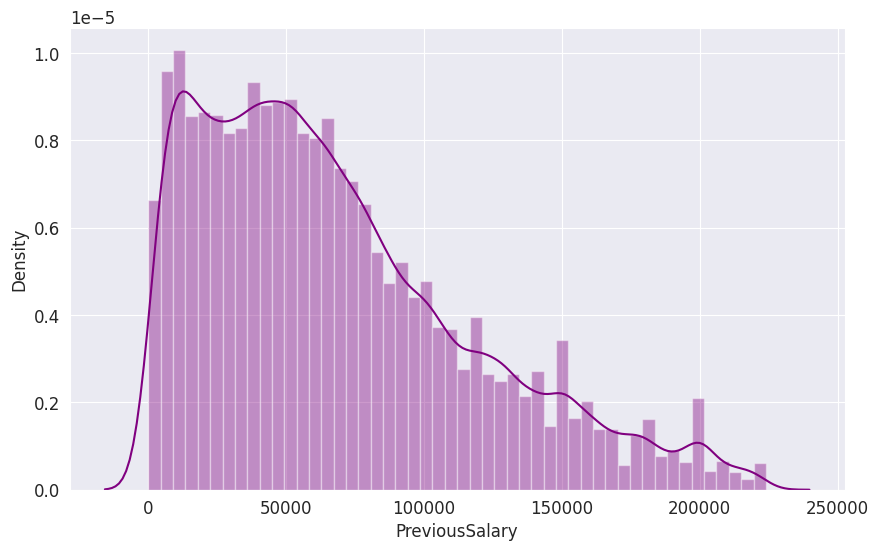

In [40]:
plt.figure(figsize=(10, 6))
sns.distplot(df['PreviousSalary'], color='purple', bins=50, hist_kws={'alpha': 0.4})

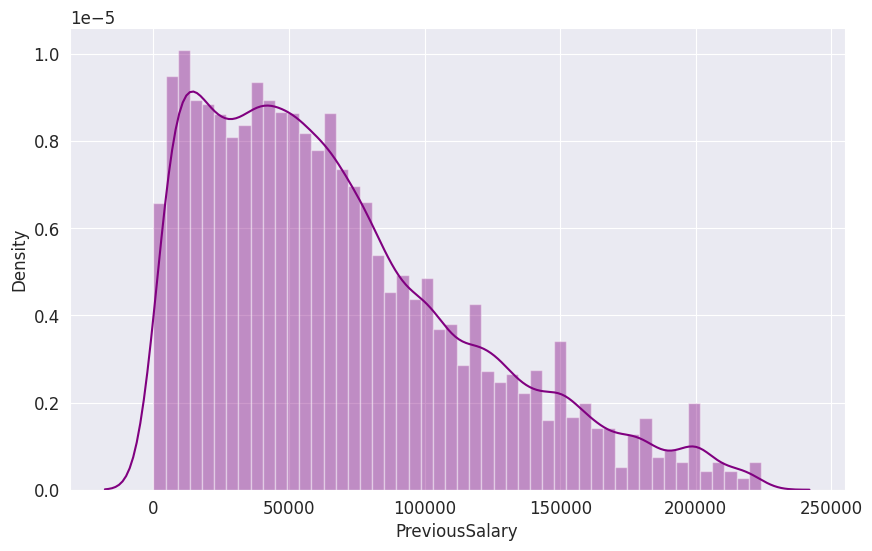

In [41]:
plt.figure(figsize=(10, 6))
sns.distplot(df[df['Employed'] == 1]['PreviousSalary'], color='purple', bins=50, hist_kws={'alpha': 0.4})
plt.show()

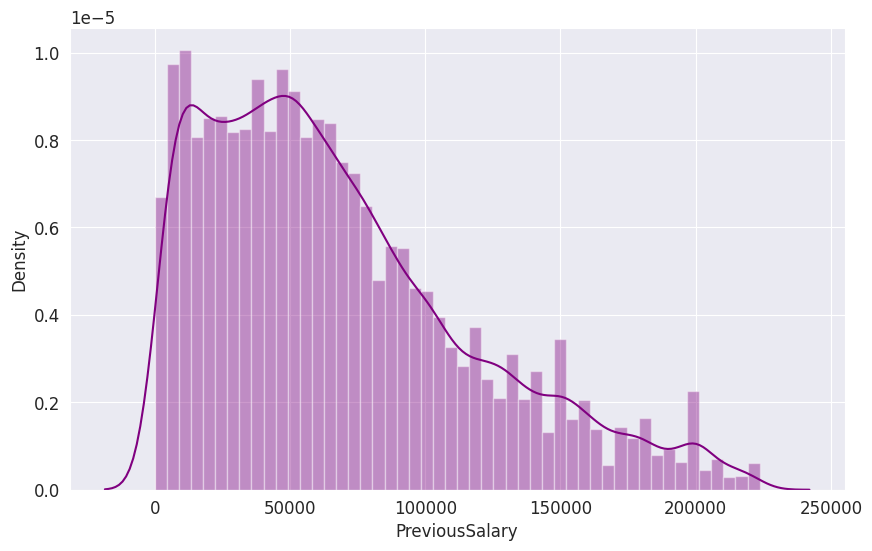

In [42]:
plt.figure(figsize=(10, 6))
sns.distplot(df[df['Employed'] == 0]['PreviousSalary'], color='purple', bins=50, hist_kws={'alpha': 0.4})
plt.show()

<Axes: xlabel='YearsCodePro', ylabel='Density'>

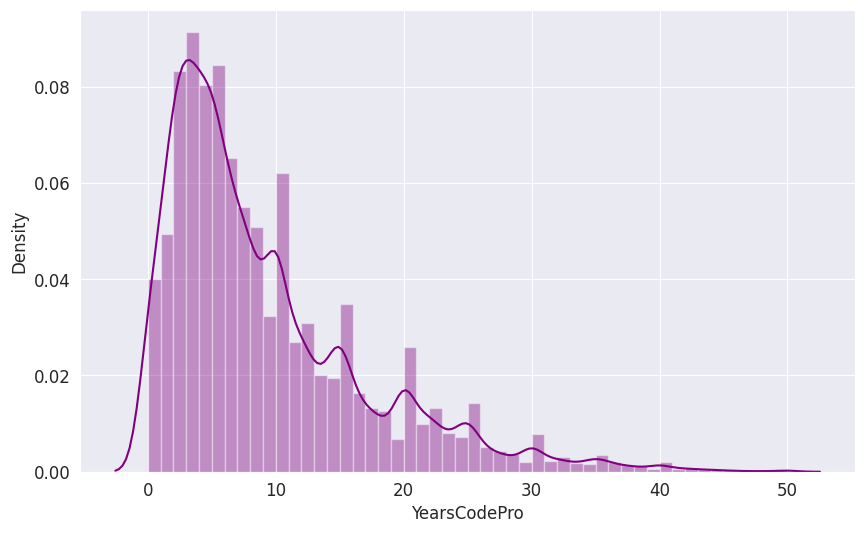

In [43]:
plt.figure(figsize=(10, 6))
sns.distplot(df['YearsCodePro'], color='purple', bins=50, hist_kws={'alpha': 0.4})

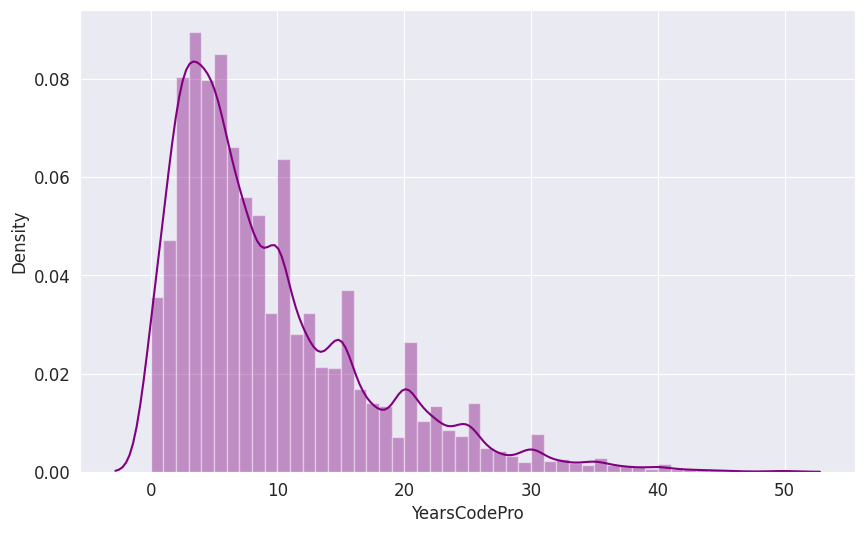

In [44]:
plt.figure(figsize=(10, 6))
sns.distplot(df[df['Employed'] == 1]['YearsCodePro'], color='purple', bins=50, hist_kws={'alpha': 0.4})
plt.show()

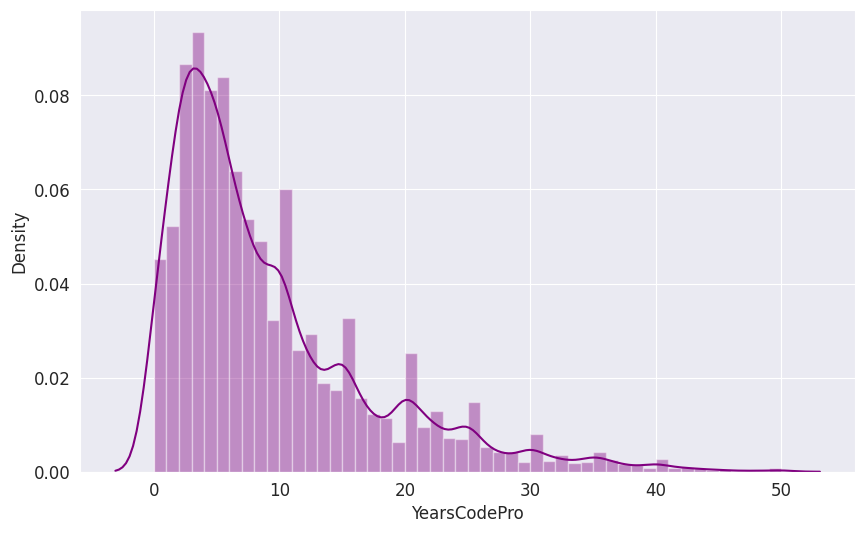

In [45]:
plt.figure(figsize=(10, 6))
sns.distplot(df[df['Employed'] == 0]['YearsCodePro'], color='purple', bins=50, hist_kws={'alpha': 0.4})
plt.show()

In [46]:
df[(df['Age'] == '<35') & (df['YearsCode'] > 35)]
# 4 incoherent cases

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
34790,34790,<35,No,Undergraduate,0,Man,Yes,Dev,50,50,Egypt,9996.00,Python;R;SQL;Git;Django;Flask;AWS;Heroku;MySQL;SQLite,10,0
52503,52503,<35,No,Master,1,Man,No,Dev,50,20,India,64500.00,Ansible;AWS;Firebase Realtime Database;Redis,4,0
57970,57970,<35,Yes,Master,1,NonBinary,Yes,Dev,40,36,Afghanistan,158484.00,APL;Assembly;Bash/Shell;C;C#;C++;COBOL;Crystal;Dart;Delphi;Erlang;F#;Fortran;Go;Groovy;Haskell;HTML/CSS;Java;JavaScript;Julia;Kotlin;LISP;Lua;Objective-C;Perl;PHP;PowerShell;Python;R;Ruby;Rust;SAS...,41,1
62254,62254,<35,No,NoHigherEd,1,Woman,Yes,Dev,41,8,Saudi Arabia,17916.00,APL,1,0


**Understanding correlation between all features**

<Axes: xlabel='PreviousSalary'>

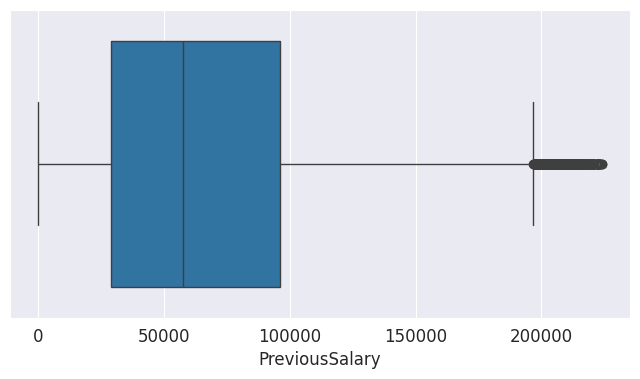

In [47]:
sns.boxplot(x=df["PreviousSalary"])

<Axes: xlabel='ComputerSkills'>

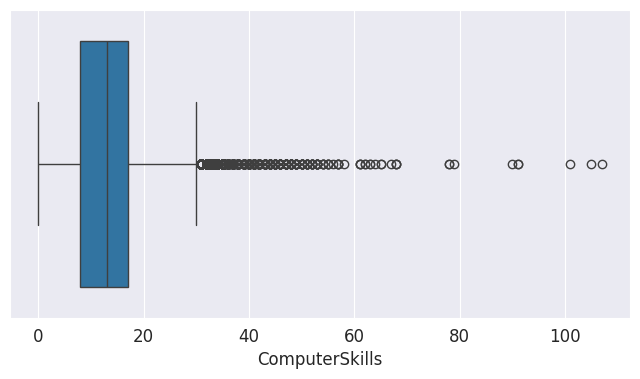

In [48]:
sns.boxplot(x=df["ComputerSkills"])

# **Encoding Variables**

In [49]:
df['MentalHealth'] = df['MentalHealth'].map({'Yes': 1, 'No': 0})
df['Accessibility'] = df['Accessibility'].map({'Yes': 1, 'No': 0})
df['MainBranch'] = df['MainBranch'].map({'Dev': 1, 'NotDev': 0})
df['Age'] = df['Age'].map({'<35': 1, '>35': 0})
df['Gender'] = df['Gender'].map({'Man': 0, 'Woman': 1, 'NonBinary': 2})
df = pd.get_dummies(df, columns=['EdLevel'])
# mapping categorical values, either binary ones or dummies

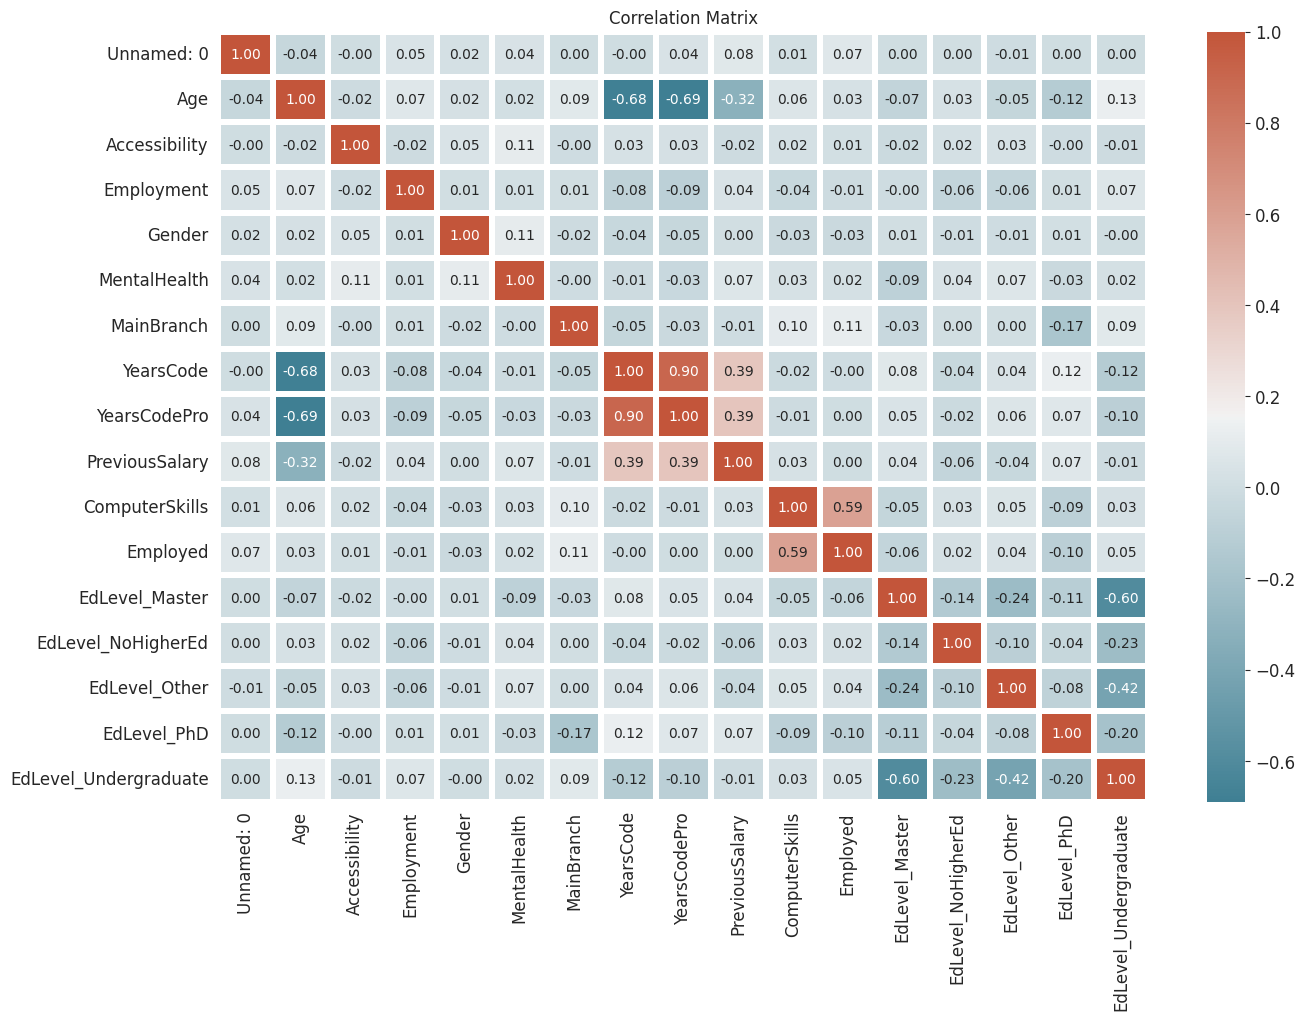

In [50]:
matrice_corr = df.corr()
plt.figure(figsize=(15, 10))

sns.heatmap(data=matrice_corr, annot=True, fmt=".2f", cmap=sns.diverging_palette(220, 20, as_cmap=True), linewidths=3, annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [51]:
df = pd.get_dummies(df, columns=['Country'])

In [52]:
HaveWorkedWith_encoded = df['HaveWorkedWith'].str.get_dummies(';')

df = pd.concat([df, HaveWorkedWith_encoded], axis=1)
df = df.drop(columns='HaveWorkedWith')

In [53]:
df.head()

,Unnamed: 0,Age,Accessibility,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,...,Spring,Svelte,Swift,Symfony,Terraform,TypeScript,Unity 3D,Unreal Engine,VBA,VMware,Vue.js,Xamarin,Yarn,jQuery,npm
0,0,1,0,1,0,0,1,7,4,51552.00,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,1,12,5,46482.00,12,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,2,1,0,1,0,0,1,15,6,77290.00,7,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1,0,1,0,0,1,9,6,46135.00,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4,0,0,0,0,0,0,40,30,160932.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
#####df['HaveWorkedWith_split'] = df['HaveWorkedWith'].str.split(";")
#Dummy skills to look for in HaveWorkedWith column (TO BE CONFIRMED BY RESEARCH)
#####top_skills = ["Python", "SQL", "R", "HTML/CSS", "C", "C#", "C++"]
#####for skill in top_skills:
#####    df[skill] = df['HaveWorkedWith'].apply(lambda x: 1 if skill in x else 0)
#####df.head()
#####df = df.drop(columns=['HaveWorkedWith', 'HaveWorkedWith_split'])

**Normalize salaries**

In [55]:
df['PreviousSalary'] = (df['PreviousSalary'] - df['PreviousSalary'].min()) / (df['PreviousSalary'].max() - df['PreviousSalary'].min())
df['PreviousSalary']

0       0.23
1       0.21
2       0.35
3       0.21
4       0.72
        ... 
73457   0.18
73458   0.51
73459   0.26
73460   0.31
73461   0.34
Name: PreviousSalary, Length: 73462, dtype: float64

# **Models on Unbalanced Dataset**

In [56]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

from patsy import dmatrices

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, SelectFromModel, RFECV, f_regression
from sklearn.linear_model import SGDClassifier, LinearRegression, LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
import pyarrow
import sys
import joblib

import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.utils import resample

In [67]:
X = df.drop(columns='Employed')
y = df['Employed']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

## 1st Model : Decision Tree

In [70]:
clf = DecisionTreeClassifier(criterion="entropy")

In [71]:
hyperp_vals = {
  "max_depth": np.arange(1, 11),
  "min_samples_leaf": [0.01, 0.02, 0.03, 0.04, 0.1, 0.2]
}

In [89]:
clf_cv = GridSearchCV(
  estimator = clf,
  param_grid = hyperp_vals,
  scoring = "f1",
  cv = 10,
  n_jobs = -1
)

In [90]:
clf_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(criterion='entropy'),
             n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': [0.01, 0.02, 0.03, 0.04, 0.1,
                                              0.2]},
             scoring='f1')

In [ ]:
print("Decision tree best parameters: ", clf_cv.best_params_)
print("Decision tree best score; ",  clf_cv.best_score_)

In [ ]:
clf_best = DecisionTreeClassifier(
  max_depth = 7,
  min_samples_leaf = 0.01
)

y_pred_clf = clf_best.predict(X_test)

## 2nd Model : Random Forest

In [95]:
RF = RandomForestClassifier()

In [96]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [99]:
RF_cv = GridSearchCV(
        estimator = RF,
        param_grid=param_grid,
        scoring = "f1",
        cv = 10,
        n_jobs = -1)

In [100]:
RF_cv.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print("Random Forest best parameters: ", RF_cv.best_params_)
print("Random Forest best score; ", RF_cv.best_score_)

In [ ]:
RF_best = RandomForestClassifier(
    max_depth=9,
    max_features="log2",
    max_leaf_nodes=9,
    n_estimators=25)

y_pred_grid = RF_best.predict(X_test)

In [ ]:
print(classification_report(y_pred_grid, y_test))

# **Models on Rebalanced Dataset**

## Rebalancing Dataset

In [57]:
df.head()

,Unnamed: 0,Age,Accessibility,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,...,Spring,Svelte,Swift,Symfony,Terraform,TypeScript,Unity 3D,Unreal Engine,VBA,VMware,Vue.js,Xamarin,Yarn,jQuery,npm
0,0,1,0,1,0,0,1,7,4,0.23,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,1,12,5,0.21,12,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,2,1,0,1,0,0,1,15,6,0.35,7,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1,0,1,0,0,1,9,6,0.21,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4,0,0,0,0,0,0,40,30,0.72,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
X = df.drop(columns='Employed')
y = df['Employed']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [60]:
training_set = pd.concat([X_train, y_train], axis=1)

In [61]:
n_samples_per_group = training_set.groupby(['Age', 'Gender']).size().max()

resampled_segments = []

# Resample for each combination of Age and Gender in the training set only
for (age, gender), group in training_set.groupby(['Age', 'Gender']):
    resampled_segment = resample(group,
                                 replace=True,
                                 n_samples=n_samples_per_group,
                                 random_state=42)
    resampled_segments.append(resampled_segment)

# Concatenate all the resampled segments to get a balanced training set
balanced_training_set = pd.concat(resampled_segments)

# Split the balanced training set back into X and y
X_train_balanced = balanced_training_set.drop(columns='Employed')
y_train_balanced = balanced_training_set['Employed']

In [62]:
X_train_balanced

,Unnamed: 0,Age,Accessibility,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,...,Spring,Svelte,Swift,Symfony,Terraform,TypeScript,Unity 3D,Unreal Engine,VBA,VMware,Vue.js,Xamarin,Yarn,jQuery,npm
7266,7266,0,0,1,0,0,1,25,16,0.57,22,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
25924,25924,0,0,1,0,1,1,35,25,0.54,13,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
50921,50921,0,0,1,0,0,1,10,6,0.36,14,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1
7092,7092,0,0,0,0,0,1,12,6,0.41,9,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
52172,52172,0,0,1,0,0,1,20,12,0.29,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48446,48446,1,0,1,2,0,1,5,3,0.04,12,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2356,2356,1,0,1,2,1,1,12,3,0.71,17,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
35367,35367,1,0,1,2,1,1,7,4,0.16,20,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0
22943,22943,1,0,0,2,0,1,6,3,0.06,7,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 1st Model : Decision Tree

In [63]:
clf = DecisionTreeClassifier(criterion="entropy")

In [64]:
hyperp_vals = {
  "max_depth": np.arange(1, 11),
  "min_samples_leaf": [0.01, 0.02, 0.03, 0.04, 0.1, 0.2]
}

In [65]:
clf_cv = GridSearchCV(
  estimator = clf,
  param_grid = hyperp_vals,
  scoring = "f1",
  cv = 10,
  n_jobs = -1
)

In [66]:
clf_cv.fit(X_train_balanced, y_train_balanced)

KeyboardInterrupt: 

In [ ]:
print("Decision tree best parameters: ", clf_cv.best_params_)
print("Decision tree best score; ",  clf_cv.best_score_)

In [ ]:
clf_best = DecisionTreeClassifier(
  max_depth = 7,
  min_samples_leaf = 0.01
)

y_pred_clf = clf_best.predict(X_test)

## 2nd Model : Random Forest

In [ ]:
RF = RandomForestClassifier()

In [ ]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [ ]:
RF_cv = GridSearchCV(
        estimator = RF,
        param_grid=param_grid,
        scoring = "f1",
        cv = 10,
        n_jobs = -1)

In [ ]:
RF_cv.fit(X_train_balanced, y_train_balanced)

In [ ]:
print("Random Forest best parameters: ", RF_cv.best_params_)
print("Random Forest best score; ", RF_cv.best_score_)

In [ ]:
RF_best = RandomForestClassifier(
    max_depth=9,
    max_features="log2",
    max_leaf_nodes=9,
    n_estimators=25)

y_pred_grid = RF_best.predict(X_test)